# Classification - Logistic Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import svm
from statsmodels.formula.api import logit, probit, poisson, ols
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.cross_validation  import cross_val_score

C:\Users\visha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
MAINPATH="C:/Users/visha/Desktop/MSIS/Advanced Data Science/Assignments/MIDTERM/Part2/temp"
TRAINFILENAME="clean_historical_data1_time_Q12005.txt.0"
TESTFILENAME="clean_historical_data1_time_Q22005.txt.0"

In [3]:
Train_DF = pd.read_csv(MAINPATH+"/"+TRAINFILENAME,index_col=None)

In [4]:
Train_DF.head()

,LOAN_SEQ_NO,MONTHLY_REPORT_PERIOD,CUR_ACT_UPB,CUR_LOAN_DELQ_STAT,LOAN_AGE,MONTHS_LEGAL_MATURITY,CURR_INTERESTRATE,CURR_DEF_UPB,DELINQUENT
0,F105Q1000001,200504,190000.0,0,0,360,5.625,0.0,0
1,F105Q1000001,200505,190000.0,0,1,359,5.625,0.0,0
2,F105Q1000001,200506,190000.0,0,2,358,5.625,0.0,0
3,F105Q1000001,200507,189000.0,0,3,357,5.625,0.0,0
4,F105Q1000001,200508,189000.0,0,4,356,5.625,0.0,0


In [5]:
traincols=['LOAN_SEQ_NO','MONTHLY_REPORT_PERIOD','CUR_ACT_UPB','CUR_LOAN_DELQ_STAT','LOAN_AGE','MONTHS_LEGAL_MATURITY','CURR_INTERESTRATE','CURR_DEF_UPB','DELINQUENT']
traincols=['MONTHLY_REPORT_PERIOD','CUR_ACT_UPB','LOAN_AGE','MONTHS_LEGAL_MATURITY','CURR_INTERESTRATE','CURR_DEF_UPB']

In [6]:
y_train=Train_DF['DELINQUENT']
Train_DF=Train_DF[traincols]

In [7]:
Test_DF=pd.read_csv(MAINPATH+"/"+TESTFILENAME,index_col=None)

In [8]:
testcols=['MONTHLY_REPORT_PERIOD','CUR_ACT_UPB','CUR_LOAN_DELQ_STAT','LOAN_AGE','MONTHS_LEGAL_MATURITY','CURR_INTERESTRATE','CURR_DEF_UPB','DELINQUENT']
testcols=['MONTHLY_REPORT_PERIOD','CUR_ACT_UPB','LOAN_AGE','MONTHS_LEGAL_MATURITY','CURR_INTERESTRATE','CURR_DEF_UPB']


In [9]:
y_test=Test_DF['DELINQUENT']
Test_DF=Test_DF[testcols]

In [10]:
#Xtrain, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [11]:
model = LogisticRegression()
mod_fit = model.fit(Train_DF,y_train)

## Accuracy of Train

In [12]:
print(model.score(Train_DF,y_train))

0.950684714286


In [13]:
pred = mod_fit.predict(Test_DF)

## Accuracy of Test

In [14]:
metrics.accuracy_score(y_test,pred)

0.94952385714285714

## Confusion Matrix

In [24]:
print (metrics.confusion_matrix(y_test,pred))

[[6644873    3907]
 [ 349426    1794]]


In [22]:
preds = model.predict_proba(Test_DF)[:,1]
fpr,tpr, _ = roc_curve(y_test,preds)

## ROC Curve

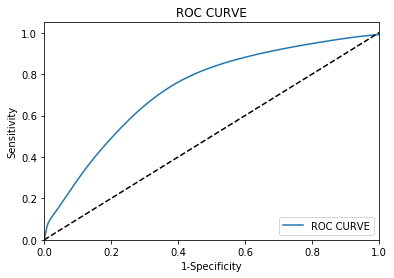

In [23]:
import matplotlib.pylab as plt

plt.figure()
plt.plot(fpr,tpr,label= "ROC CURVE")
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [19]:
logit = sm.Logit(y_train, Train_DF[traincols])
logregression_result = logit.fit()a
print(logregression_result.summary())

Optimization terminated successfully.
         Current function value: 0.182535
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             DELINQUENT   No. Observations:              7000000
Model:                          Logit   Df Residuals:                  6999994
Method:                           MLE   Df Model:                            5
Date:                Thu, 20 Jul 2017   Pseudo R-squ.:                 0.06513
Time:                        20:40:18   Log-Likelihood:            -1.2777e+06
converged:                       True   LL-Null:                   -1.3668e+06
                                        LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
MONTHLY_REPORT_PERIOD -3.017e-05   1.63e-07   -184.599      0.000     -3.05e-05 -2.99e

In [20]:
print(logregression_result.conf_int())

                              0         1
MONTHLY_REPORT_PERIOD -0.000030 -0.000030
CUR_ACT_UPB            0.000002  0.000002
LOAN_AGE               0.023022  0.023273
MONTHS_LEGAL_MATURITY  0.004697  0.004893
CURR_INTERESTRATE     -0.013716 -0.000449
CURR_DEF_UPB          -0.000012 -0.000011


In [21]:
model.coef_

array([[ -3.48573926e-05,   1.82118972e-06,   2.56470991e-02,
          7.26871997e-03,  -2.71758424e-04,  -2.00350170e-05]])